# Imports 

## Libraries and imports  

In [43]:
# Basic pandas and numpy
import pandas as pd
import numpy as np
 
# Basic visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Functions 

In [57]:
def change(x):
    """
    Changes the initial value of quality to 1 (acceptable) or 0 (not acceptable)
    to make it a binary variable.
    """
    if x <= 7:
        return 0
    else:
        return 1

    
order = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter' ]
def expanse(val):
    """
    Fills columns in order according to content of the initial list
    """
    new = ['0','0','0','0','0']
    are = [i.strip() for i in val.split(',')]
    ret=''
    for i in are:
        o = order.index(i)
        new[o]=1
    for i,f in enumerate(new):
        ret += str(f)
        if i < len(new)-1:
            ret += ','
    return ret

def logreg(X_train,y_train,X_test, y_test, k):
    lr = LogisticRegression(random_state=0, solver='lbfgs',  C=k,
                            multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return f1_score(y_test,y_pred, average='micro')

def logreg2(X_train,y_train,X_test, y_test, k):
    lr = LogisticRegression(random_state=0, solver='lbfgs', C=k,
                            multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr.predict(X_train)
    return f1_score(y_train,y_pred, average='micro')

def metrics(X_train,y_train,X_test, y_test, k):
    lr = LogisticRegression(random_state=0, solver='lbfgs',  C=k,
                            multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr.predict(X_test)    
    print(classification_report(y_test, y_pred))

def confmat(X_train,y_train,X_test, y_test, k):
    lr = LogisticRegression(random_state=0, solver='lbfgs',  C=k,
                            multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print_cm(cm)
    
def print_cm(cm, title=''):
    fig, ax = plt.subplots(figsize=(3,3))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['','']
    plt.title('Confusion Matrix '+str(title))
    plt.ylabel('True label')
    plt.xlabel('')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j-0.3,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

## Initial Dataset  

In [3]:
cookies = pd.read_csv('data/cookies.csv')

# EDA 

## General information 

In [4]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [5]:
cookies.shape

(5198, 16)

In [6]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5196 non-null object
crunch factor           5198 non-null float64
aesthetic appeal        5198 non-null int64
dtypes: float64(10), int64(4), object(2)
memory usage: 649.8+ KB


## NaNs 

In [7]:
cookies.isna().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

As there are not many null values, we decide to drop those rows

In [8]:
cookies.dropna(inplace=True)

## Variable exploration 

### Target variable

Let's see how the target variable looks like

In [9]:
cookies.quality.value_counts()

8     1778
7     1316
9      706
6      614
5      575
10     135
4       44
3        8
11       5
Name: quality, dtype: int64

Although the target variable is codified as multiple classes, what the company wants to know wether the cookie has enough quality or not. We make two groups: Quality higher or equal to 8 is acceptable and Quality lower than 7 is not acceptable.
We use one of the functions defined above.

In [10]:
cookies.quality = cookies.quality.apply(change)

Let's check the distribution of our final variable:

In [11]:
cookies.quality.value_counts()

1    2624
0    2557
Name: quality, dtype: int64

It seems quite balanced

### Numerical variables

In [12]:
cookies.describe().T

,count,mean,std,min,25%,50%,75%,max
sugar to flour ratio,5181.0,0.318215,0.149769,0.00000,0.2400,0.3100,0.39000,3.0
sugar index,5181.0,5.401718,4.669065,0.60000,1.8000,3.0000,8.00000,31.6
bake temp,5181.0,559.496236,353.265184,90.00000,380.0000,470.0000,640.00000,6110.0
chill time,5181.0,30.383903,17.249170,0.00000,17.0000,29.0000,41.00000,146.5
calories,5181.0,115.022679,56.468852,-99.00000,76.0000,118.0000,155.00000,366.5
density,5181.0,0.995435,0.055723,0.98711,0.9923,0.9948,0.99691,5.0
pH,5181.0,8.221892,0.283618,7.72000,8.1100,8.2100,8.32000,25.0
grams baking soda,5181.0,0.531002,0.151002,0.22000,0.4300,0.5100,0.60000,2.0
bake time,5181.0,10.495561,1.194958,8.00000,9.5000,10.3000,11.30000,14.9
quality,5181.0,0.506466,0.500006,0.00000,0.0000,1.0000,1.00000,1.0


Diameter is a redundant variable, as it is 7 for all the rows. We drop it

In [13]:
cookies.drop(columns = ['diameter'], inplace=True)

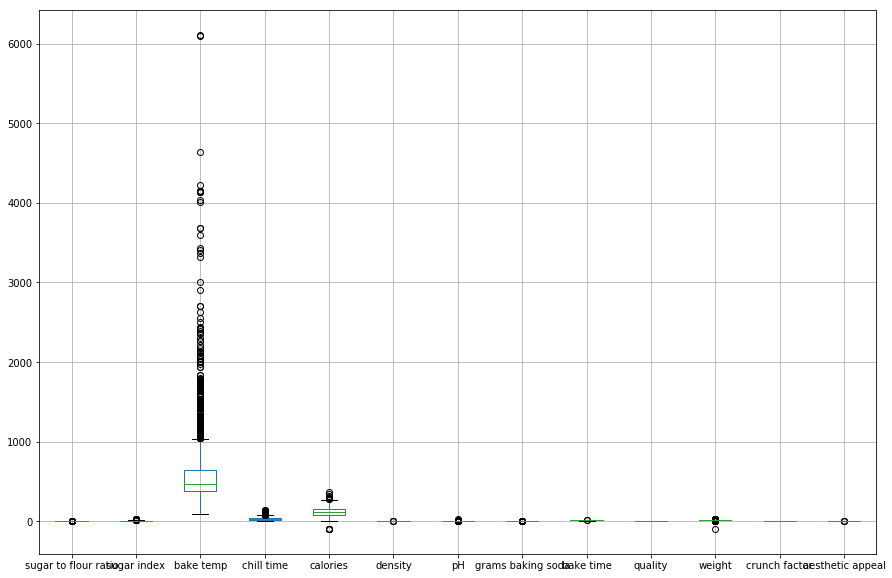

In [14]:
plt.figure(figsize= (15, 10))
cookies.boxplot()

Notes: Bake Temperature has a lot of outliers. We will investigate

But first we will plot the rest of variables for scale reasons

In [15]:
a = [i for i in list(cookies.columns) if i != ['bake temp', 'butter type', 'mixins']]

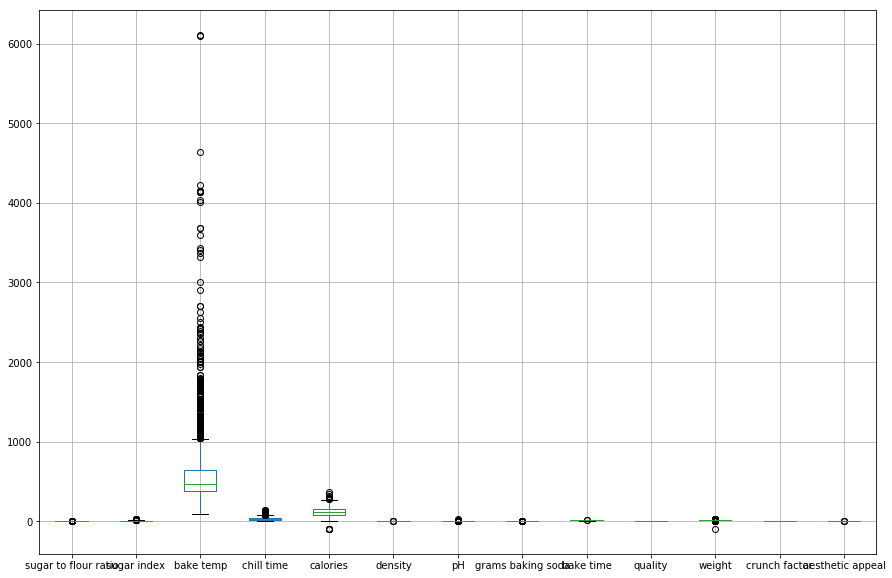

In [16]:
plt.figure(figsize= (15, 10))
cookies[a].boxplot()

Notes:
* Calories and Weight cannot be negative

#### pH

Lets have a close look at pH, which must be in the 0-14 range

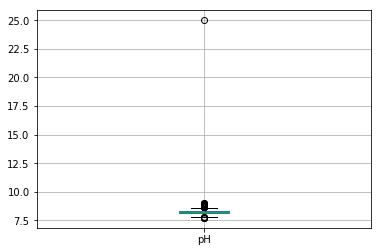

In [17]:
cookies[['pH']].boxplot()

We decided to approximate the pH error to the mean:

In [18]:
cookies.pH[cookies.pH > 14] = cookies.pH.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Bake Temperature 

There are a lot of outliers in the high range, baking temperatures over 1000F seem unrealistic. same goes for temperatures below 100F


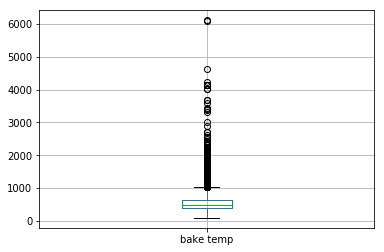

In [19]:
cookies[['bake temp']].boxplot()

We decided to drop the values higher than 1000F

In [20]:
cookies = cookies[cookies['bake temp'] < 1000]

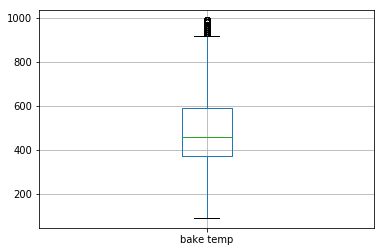

In [21]:
cookies[['bake temp']].boxplot()

#### Columns with negative values: Calories and Weight 

In [22]:
cookies = cookies[cookies['calories'] > 0]

In [23]:
cookies = cookies[cookies['weight'] > 0]

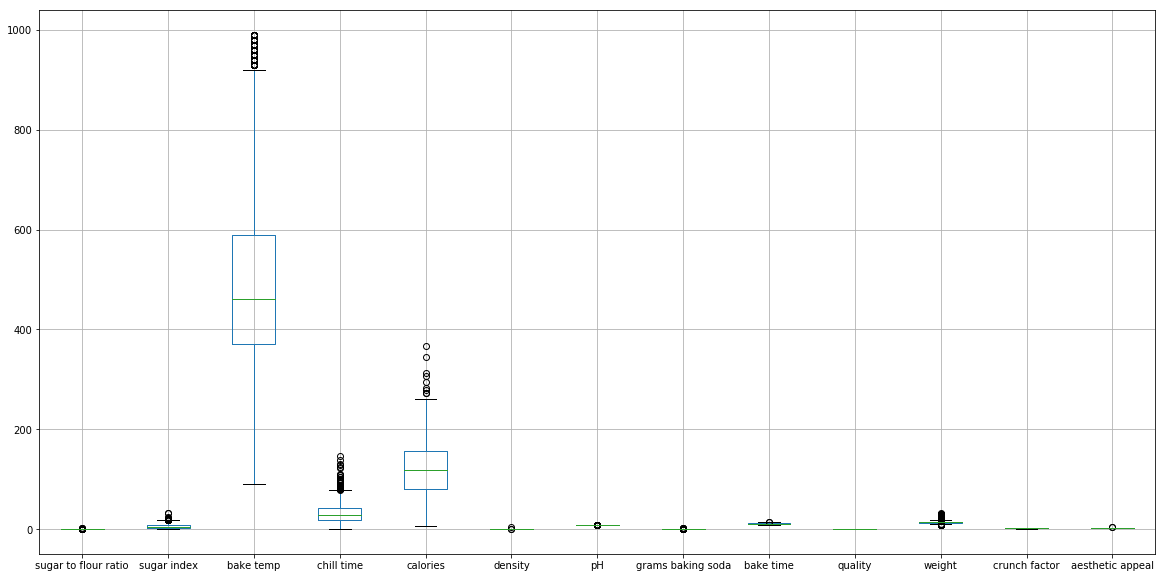

In [24]:
plt.figure(figsize= (20, 10))
cookies[a].boxplot()

#### Correlation Matrix 

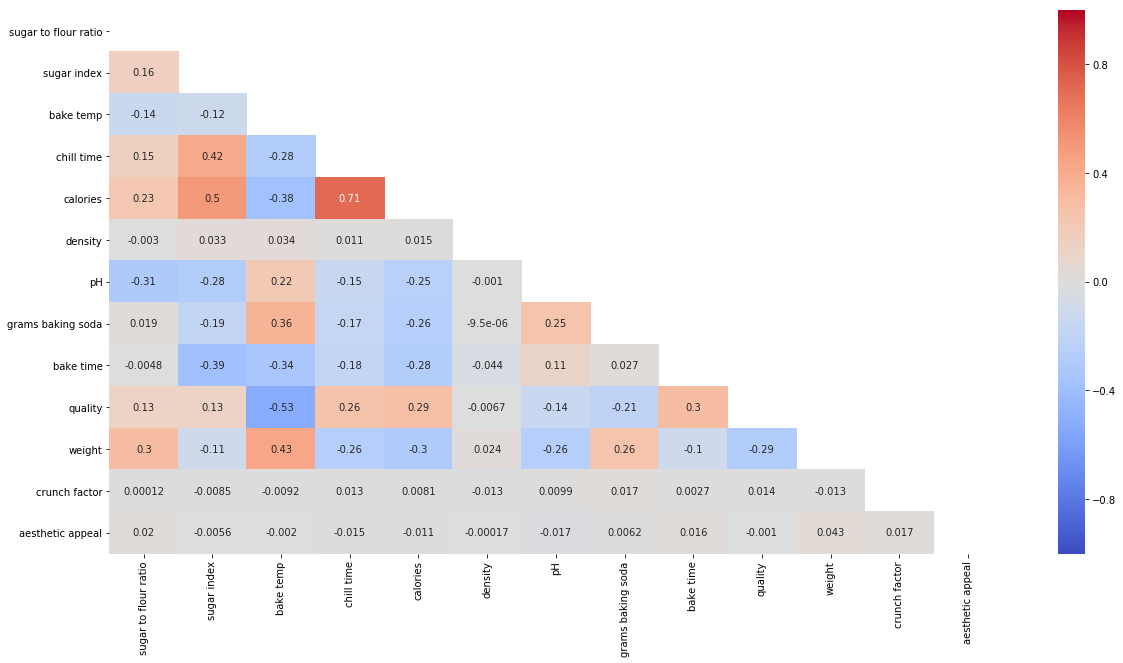

In [25]:
cormat = cookies.corr()
figsize = (20,10)
vmin= -1 # Sets maximum color
vmax= 1 # Sets minimum color
cmap = 'coolwarm' # Palette
# Create mask for upper half:
mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot figure:
plt.figure(figsize=figsize)
sns.heatmap(cormat,
vmin=vmin, vmax=vmax,
cmap=cmap,
annot=True,
mask= mask)

### Categorical

* Butter type
* Mixings

In [26]:
for i in ['butter type', 'mixins']:
    print(i)
    display(cookies[i].value_counts())

butter type


melted    3813
cubed     1088
Name: butter type, dtype: int64

mixins


chocolate                         1847
raisins                           1135
chocolate, oats                    729
nuts, chocolate                    476
nuts,raisins                       292
nuts, oats, chocolate              254
nuts, oats                          86
chocolate, peanut butter            45
raisins, oats                       19
peanut butter                       12
oats                                 4
chocolate, oats, peanut butter       2
Name: mixins, dtype: int64

There are a few different values but all of them are a combination of the following elements:
* raisins
* nuts
* chocolate
* oats
* peanut butter

We will deal with this later in the feature engineering part

# Preprocessing and Feature Engineering

### Mixins

We decided to divide the list of mixings into different columns and assign a 0-1 (not contain - contains) for each one of the ingredients. We did that by using one of the functions defined above.

In [27]:
cookies.mixins = cookies.mixins.apply(expanse)

In [28]:
df1 = cookies["mixins"].str.split(",", n = 4, expand = True)
df1.columns = order

for f in order:
    df1[f]=df1[f].astype('int64', copy=False)
    
df1.drop(['chocolate'], axis=1,inplace=True) # We get rid of one of the columns

df1.head()

,raisins,oats,nuts,peanut butter
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,1,1,0


We drop the original column and merge this dataframe with the baseline one

In [29]:
cookies.drop(['mixins'], axis=1,inplace=True)
cookies = pd.merge(cookies, df1, left_index=True, right_index=True)

In [30]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,crunch factor,aesthetic appeal,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,1,melted,15.2,1.30,3,1,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,0,melted,12.4,1.71,3,1,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,1,melted,9.4,1.78,3,0,0,1,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,0,melted,12.2,1.59,3,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,0,cubed,19.8,1.30,3,0,1,1,0


### Butter Type 

Also, we made dummies with the butter column.

In [31]:
butter_type = pd.get_dummies(cookies['butter type']) # Butter type is separated as a new variable with dummies mad
cookies = pd.merge(cookies, butter_type, left_index=True, right_index=True) # We merge both dataframes
cookies.drop(['butter type'], axis=1,inplace=True) # We drop the original butter column from the dataframe

In [32]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,aesthetic appeal,raisins,oats,nuts,peanut butter,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,1,15.2,1.30,3,1,0,0,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,0,12.4,1.71,3,1,0,0,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,1,9.4,1.78,3,0,0,1,0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,0,12.2,1.59,3,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,0,19.8,1.30,3,0,1,1,0,1,0


# Model Creation

## Creating constants and Splitting

In [33]:
Y = cookies['quality']
X = cookies.drop(columns='quality')

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size= 0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

## Scaling

As the numerical variables have different magnitudes, a pre-scaling must be done

## Running the model

After trying a few algorithms we decide to stick with K-Nearest Neighbours. You can resort to the file 'models.ipynb' to see the different models and parameters that we tried.

### Grid Search and Cross Validation

In [37]:
print("LogisticRegression")
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#param_grid = {'C':np.arange(0.01,100,10)}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10,n_jobs=-1, verbose=True)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

LogisticRegression
Parameter grid:
{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']}
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   13.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test set score: 0.80
Best parameters: {'C': 1000.0, 'penalty': 'l1'}
Best cross-validation score: 0.81


In [38]:
def compare(method_test,method_train, alist):
    li=[]
    test=[]
    ks = alist
    for f in ks:
        #li.append(getRFR(f,X_train, y_train))
        #test.append(getRFR(f,X_test, y_test))
        r = method_test(X_train,y_train,X_test, y_test,f)
        t = method_train(X_train,y_train,X_test, y_test,f)
        print(r,t)
        li.append(r)
        test.append(t)

    li

    plt.plot(ks,li, label='test',color='blue');
    plt.plot(ks, test, label='train',color='orange');

    plt.legend()
    plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7930682976554536 0.8002551020408163


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7930682976554536 0.7964285714285714


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7971457696228339 0.7928571428571428


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.8020408163265306


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7930682976554536 0.7931122448979592


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7971457696228339 0.7926020408163266


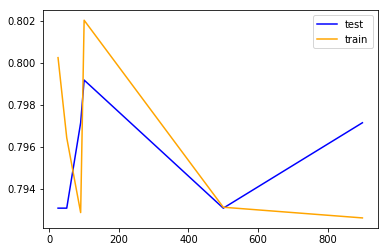

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.8020408163265306


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8022426095820592 0.7964285714285714


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7981651376146789 0.7915816326530613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.7938775510204081


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7961264016309887 0.7943877551020408


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7981651376146789 0.8000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.7941326530612245


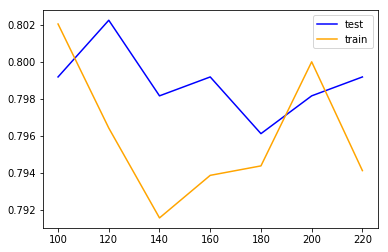

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.8020408163265306


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7981651376146789 0.8012755102040817


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8022426095820592 0.7964285714285714


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7910295616717635 0.7971938775510206


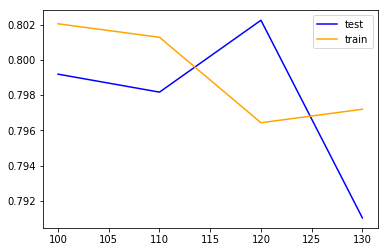

In [41]:
compare(logreg,logreg2,[25,50,90,100,500,900])
compare(logreg,logreg2,[100,120,140,160,180,200,220])
compare(logreg,logreg2,[100,110,120,130])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8022426095820592

## Metrics 

In [45]:
metrics(X_train,y_train,X_test, y_test, 120)

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       451
           1       0.80      0.85      0.82       530

   micro avg       0.80      0.80      0.80       981
   macro avg       0.80      0.80      0.80       981
weighted avg       0.80      0.80      0.80       981



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


* We have found a good model to predict cookie quality in a binary basis.
* Generally our model performs better predicting the quality of the good cookies than it does with the bad cookies

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
No handles with labels found to put in legend.


0.8732083838848681


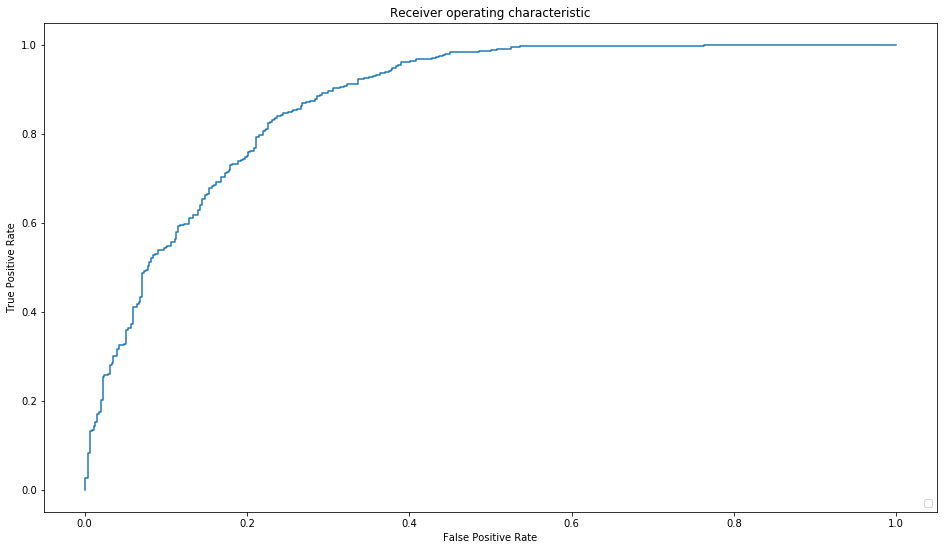

In [60]:
from sklearn import metrics

lr = LogisticRegression(random_state=0, solver='lbfgs', C=120, multi_class='multinomial').fit(X_train, y_train)
ks_model = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)
#Consider a binary classification for labels 0 and 1.

#Predict will give either 0 or 1 as output
#Predict_proba will give the only probability of 1.

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

plt.figure(figsize=(16,9))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve')
plt.plot(fpr,tpr);